### Flavia Carravieri
# <span style="color:deeppink"> NSL - ESERCITAZIONE 11</span>

### ESERCIZIO 11.2

Si è esteso il modello per fittare 

$$
f(x)=4-3x-2x^2+3x^3
$$
in $x \in [-1,1]$.

Si procede come nell'esercizio precedente:

1. si fissano i parametri 

In [6]:
# target parameters of f(x) = m*x + b
a = 3 # slope
b = -2
c= -3
d= 4# intersect

2. si generano i dati con rumore 

In [9]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort() #ordino per unire meglio i punti nel grafico
y_target = a * x_valid **3 + b * x_valid**2 + c * x_valid +d # ideal (target) linear function

#sigma = 0.0 # noise standard deviation, for the moment it is absent
sigma = 0.3
y_train = np.random.normal(a * x_train **3 + b * x_train**2 + c * x_train +d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid **3 + b * x_valid**2 + c * x_valid +d, sigma)

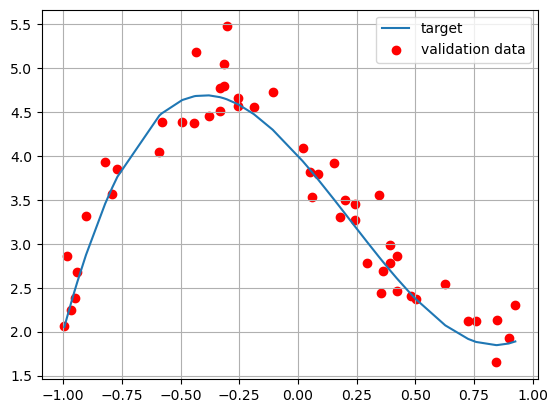

In [11]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

3. si crea il modello 

In [89]:
# compose the NN model
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

#import tensorflow.keras as keras
print(keras.__version__)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.utils import get_custom_objects

model = keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras import backend as K
#from tensorflow.keras.utils import get_custom_objects

#model = tf.keras.Sequential()
#model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
#model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2.18.1
3.6.0


In [91]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,741 (6.80 KB)

 Trainable params: 1,741 (6.80 KB)

 Non-trainable params: 0 (0.00 B)

4. si allena il la rete

In [94]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 11.6975 - mse: 11.6975 - val_loss: 11.5552 - val_mse: 11.5552
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.6269 - mse: 10.6269 - val_loss: 9.5543 - val_mse: 9.5543
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3653 - mse: 8.3653 - val_loss: 6.0282 - val_mse: 6.0282
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6552 - mse: 4.6552 - val_loss: 2.2499 - val_mse: 2.2499
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9213 - mse: 1.9213 - val_loss: 1.7994 - val_mse: 1.7994
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3513 - mse: 1.3513 - val_loss: 1.5561 - val_mse: 1.5561
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1328 - mse: 1.1328 - val_loss: 1.2773 - val_mse: 1.2773
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1632 - mse: 1.1632 - val_loss: 1.0228 - val_mse: 1.0228
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6748 

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [127]:
# return weights and biases
pesi= model.get_weights() #assegno una variabile per non avere la stampa

5. Si valuta il modello

In [99]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0947 - mse: 0.0947

Test loss: 0.09294728934764862
Test accuracy: 0.09294728934764862


In [101]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mse: 0.0079 

Test loss: 0.006925106514245272
Test accuracy: 0.006925106514245272


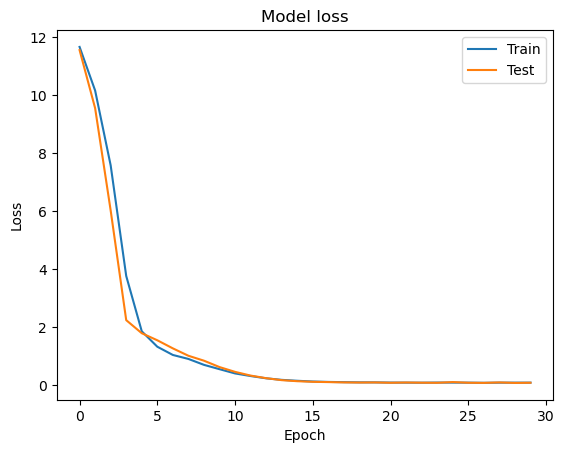

In [103]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
6. Si prova il modello sui dati test

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


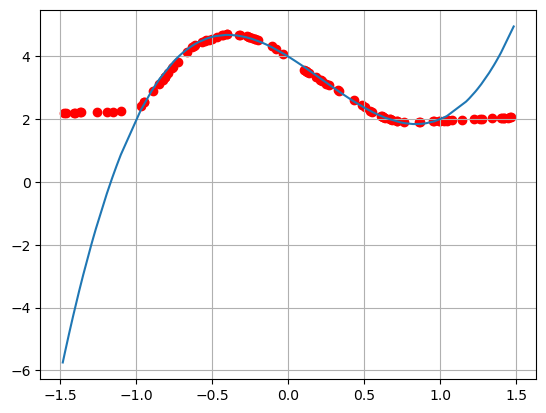

In [111]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
x_valid = np.random.uniform(-1.5, 1.5, 100)
x_valid.sort() #ordino per unire meglio i punti nel grafico
y_target = a * x_valid **3 + b * x_valid**2 + c * x_valid +d # ideal (target) linear function
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()


Data la maggiore di questo fit si è sentita la necessità di creare un'architettura più complessa: si sono aggiunti 5 layer da 20 neuroni l'uno, con funzione di attivazione relu. Generati 500 dati di train, si è fatto allenare il modello per 30 epoche. 

Ci si può ritenere soddisfatti vedendo che la loss function decresce drasticamente sia per il train che per il test e le due, all'aumentare delle epoche non si discostano di molto. 

Infine, si osserva che nel range in cui il modello è stato allenato, ovvero tra -1 e 1, i punti predetti nel test seguono l'andamento di quelli attesi, tuttavia al di fuori di questo intervallo i risultati ottenuti sono nettamente peggiori. 